In [1]:
#Using codes 61-72

#STEP 0: IMPORTING LIBRARIES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import os

#STEP 1: LOADING INPUT DIRECTORY
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#STEP 2: READING CSV FILE
dset = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv")

#STEP 3: SWITCHING TO SHAPED VERSION OF THE CSV
dset.to_csv("DIY Loan Predictor Shaped.csv")
dset = pd.read_csv("/kaggle/working/DIY Loan Predictor Shaped.csv")

#STEP 4: DROPPING UNNECESSARY COLUMNS
dset = dset.drop("Id", axis = 1)
dset = dset.drop("STATE", axis=1)
dset = dset.drop("Unnamed: 0", axis = 1)

#STEP 5: CHECKING FOR NULL VALUES
dset.isnull().sum()

#STEP 6: IDENTIFIYING AND HANDLING UNIQUE VALUES
dset['Married/Single'].unique()
dset['House_Ownership'].unique()
dset['Car_Ownership'].unique()
dset['Profession'].unique()
dset['CITY'].unique()

#STEP 7: ENCODING CATGORICAL VARIABLES INTO NUMERICAL REPRESENTATIONS
enc = LabelEncoder()
catCols = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY']
for cols in catCols:
    dset[cols] = enc.fit_transform(dset[cols])
    
dset.info()

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Income             252000 non-null  int64
 1   Age                252000 non-null  int64
 2   Experience         252000 non-null  int64
 3   Married/Single     252000 non-null  int64
 4   House_Ownership    252000 non-null  int64
 5   Car_Ownership      252000 non-null  int64
 6   Profession         252000 non-null  int64
 7   CITY               252000 non-null  int64
 8   CURRENT_JOB_YRS    252000 non-null  int64
 9   CURRENT_HOUSE_YRS  252000 non-null  int64
 10  Risk_Flag          252000 non-null  int64
dtypes: int64(11)
memory usage: 21.1 MB


In [2]:
#STEP 8: SPLITTING THE RISK FACTOR
Y = dset["Risk_Flag"]
X = dset.drop("Risk_Flag",axis = 1)
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,251,3,13
1,7574516,40,10,1,2,0,43,227,9,13
2,3991815,66,4,0,2,0,47,8,4,10
3,6256451,41,2,1,2,1,43,54,2,12
4,5768871,47,11,1,2,0,11,296,3,14


In [3]:
#STEP 9: LISTING THE RISK FACTOR IN A DATAFRAME
Y=pd.DataFrame(Y)
Y.head()

,Risk_Flag
0,0
1,0
2,0
3,1
4,1


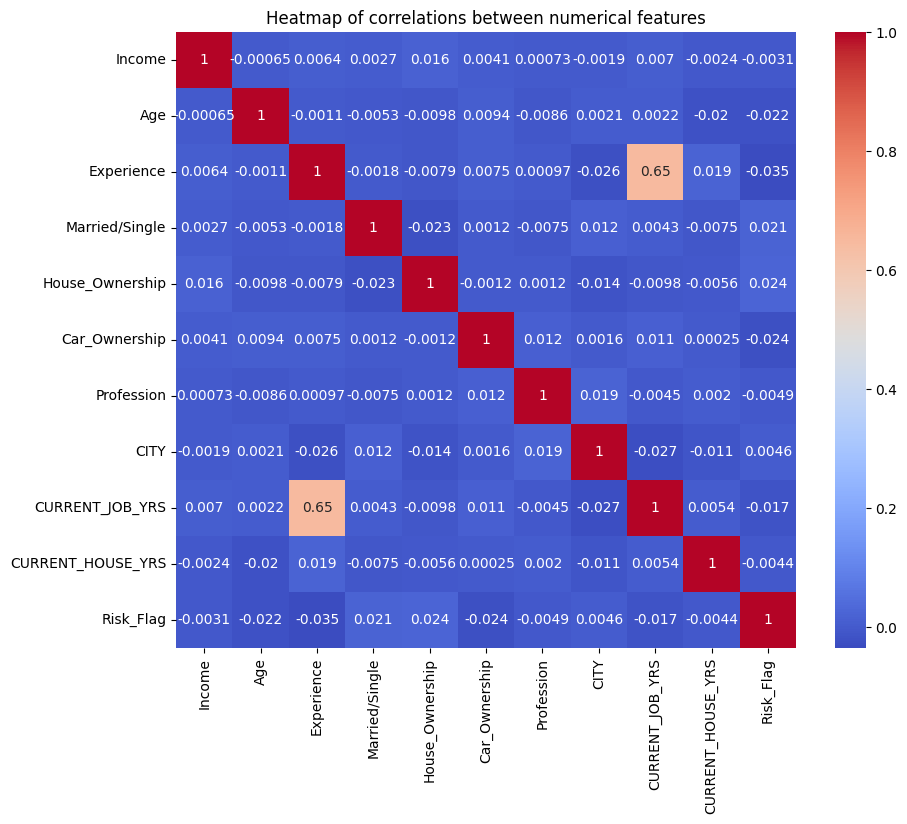

In [4]:
# Correlation matrix
corr_matrix = dset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of correlations between numerical features")
plt.show()

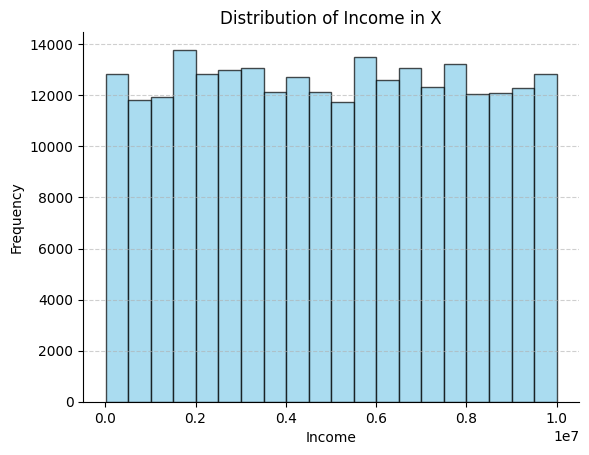

In [5]:


# Assuming X is your DataFrame
income_data = X['Income']  # Extract the income data

# Customize the histogram
plt.hist(income_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)  # Adjust bins, color, and transparency

# Customize axes and labels
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income in X')

# Customize gridlines and spines
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add gridlines to y-axis
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines

plt.show()



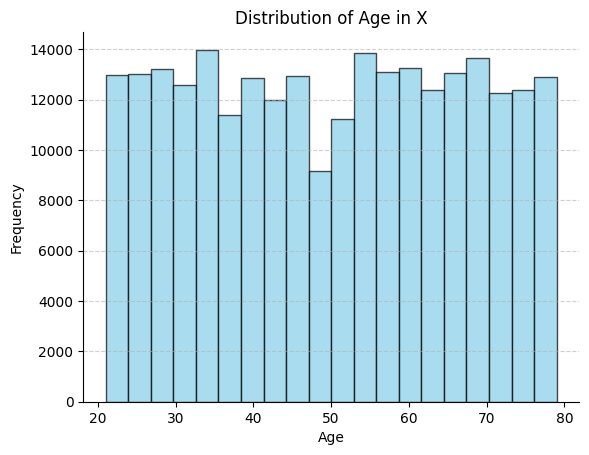

In [6]:
from matplotlib import pyplot as plt
age_data = X['Age']  # Extract the age data

# Create the histogram with customizations
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Customize axes and labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in X')

# Customize gridlines and spines
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


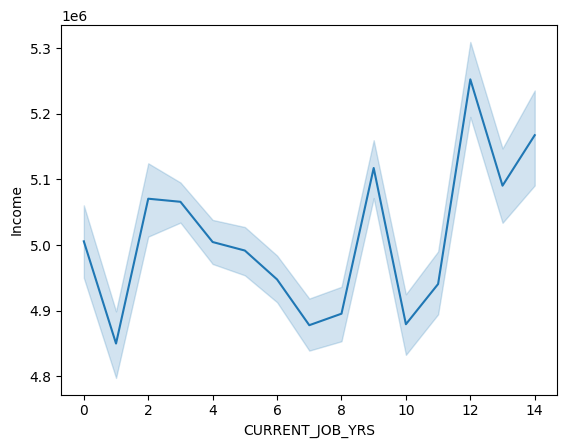

In [7]:
sns.lineplot(data=dset, x="CURRENT_JOB_YRS", y="Income")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


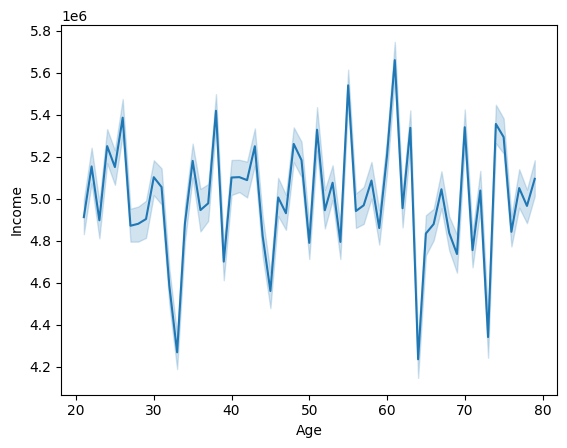

In [8]:
sns.lineplot(data=dset, x="Age", y="Income")
plt.show()

In [9]:
unique_ages = dset["Age"].unique()
unique_ages

array([23, 40, 66, 41, 47, 64, 58, 33, 24, 78, 22, 28, 57, 48, 39, 71, 56,
       54, 50, 72, 36, 76, 38, 31, 52, 59, 21, 26, 55, 45, 77, 63, 30, 25,
       73, 75, 27, 74, 67, 46, 68, 79, 42, 60, 32, 65, 49, 35, 61, 29, 37,
       69, 62, 53, 70, 34, 43, 44, 51])

In [10]:
age_mapping = {"20-29": 25, "30-39": 35, "40-49": 45, "50-59": 55, "60-69": 65, "70-79": 75}  # Define your mapping
dset["Age_int"] = dset["Age"].map(age_mapping)

dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             252000 non-null  int64  
 1   Age                252000 non-null  int64  
 2   Experience         252000 non-null  int64  
 3   Married/Single     252000 non-null  int64  
 4   House_Ownership    252000 non-null  int64  
 5   Car_Ownership      252000 non-null  int64  
 6   Profession         252000 non-null  int64  
 7   CITY               252000 non-null  int64  
 8   CURRENT_JOB_YRS    252000 non-null  int64  
 9   CURRENT_HOUSE_YRS  252000 non-null  int64  
 10  Risk_Flag          252000 non-null  int64  
 11  Age_int            0 non-null       float64
dtypes: float64(1), int64(11)
memory usage: 23.1 MB


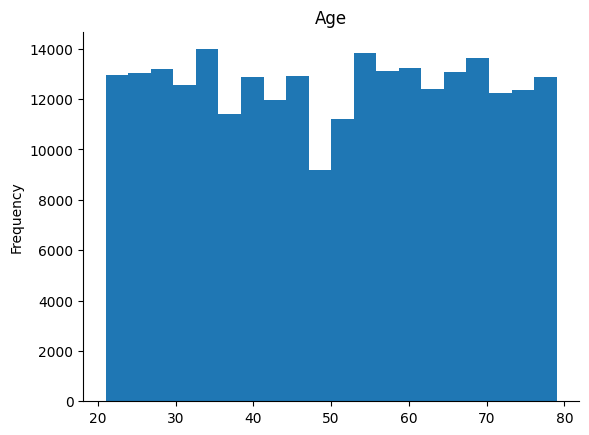

In [11]:
dset['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

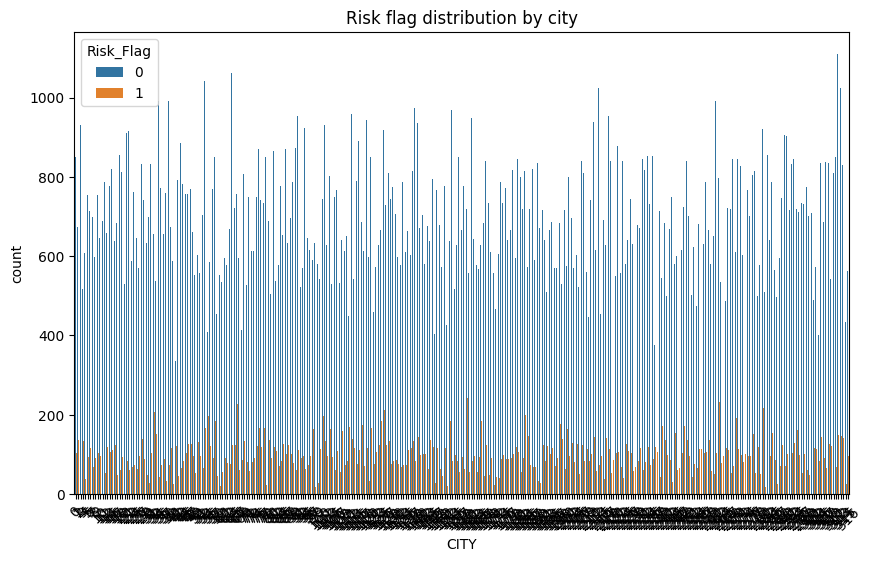

In [12]:
# VISUALIZATION 4: RISK FLAG DISTRIBUTION BY CITY
plt.figure(figsize=(10, 6))
sns.countplot(x="CITY", hue="Risk_Flag", data=dset)
plt.title("Risk flag distribution by city")
plt.xticks(rotation=45)
plt.show()

In [13]:
# SPLITTING THE TEST AND THE VALIDATION DATA
X_train_full, X_valid_full, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
dset.head(20)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_int
0,1303834,23,3,1,2,0,33,251,3,13,0,NaN
1,7574516,40,10,1,2,0,43,227,9,13,0,NaN
2,3991815,66,4,0,2,0,47,8,4,10,0,NaN
3,6256451,41,2,1,2,1,43,54,2,12,1,NaN
4,5768871,47,11,1,2,0,11,296,3,14,1,NaN
5,6915937,64,0,1,2,0,11,130,0,12,0,NaN
6,3954973,58,14,0,2,0,31,299,8,12,0,NaN
7,1706172,33,2,1,2,0,20,134,2,14,0,NaN
8,7566849,24,17,1,2,1,25,165,11,11,0,NaN
9,8964846,23,12,1,2,0,2,149,5,13,0,NaN
